Election Data:

| State                   | Party        | Seats_Won     | Total_Seats          | Voter_Turnout (%) |
|-------------------------|--------------|---------------|----------------------|-------------------|
| Madhya Pradesh          | BJP          | 163           | 230                  | 72.1              |
| Madhya Pradesh          | INC          | 66            | 230                  | 72.1              |
| Madhya Pradesh          | BSP          | 0             | 230                  | 72.1              |
| Madhya Pradesh          | Others       | 1             | 230                  | 72.1              |
| Rajasthan               | BJP          | 115           | 200                  | 74.2              |
| Rajasthan               | INC          | 69            | 200                  | 74.2              |
| Rajasthan               | BSP          | 2             | 200                  | 74.2              |
| Rajasthan               | Others       | 13            | 200                  | 74.2              |


And perform the following tasks:  
1. Check if the file `election_data.csv` exists in the directory. If not, create the file and write the election data into it. Handle file-related exceptions gracefully.
2. Read the data into a Pandas DataFrame and calculate the percentage of seats won by each party. Add this as a new column named Seats_Percentage.
3. Determine the party with the highest number of seats in each state and display their names.
4. Create a bar chart showing the number of seats won by each party in each state using Matplotlib or Seaborn.
5. Ensure your script includes exception handling for file reading, writing, and any potential calculation errors.


In [2]:
import pandas as pd

election_data = pd.DataFrame({
    "State": ["Madhya Pradesh", "Madhya Pradesh", "Madhya Pradesh", "Madhya Pradesh", "Rajasthan", "Rajasthan", "Rajasthan", "Rajasthan"],
    "Party": ["BJP", "INC", "BSP", "Others", "BJP", "INC", "BSP", "Others"],
    "Seats_Won": [163, 66, 0, 1, 115, 69, 2, 13],
    "Total_Seats": [230, 230, 230, 230, 200, 200, 200, 200],
    "Voter_Turnout (%)": [72.1, 72.1, 72.1, 72.1, 74.2, 74.2, 74.2, 74.2]
})
try:
    pd.read_csv('election_data.csv')
except FileNotFoundError:
    election_data.to_csv('election_data.csv')


In [8]:
df=pd.read_csv('election_data.csv')
df['Seats_Percentage']=(df['Seats_Won']/df['Total_Seats'])*100
df.head()


,Unnamed: 0,State,Party,Seats_Won,Total_Seats,Voter_Turnout (%),Seats_Percentage
0,0,Madhya Pradesh,BJP,163,230,72.1,70.869565
1,1,Madhya Pradesh,INC,66,230,72.1,28.695652
2,2,Madhya Pradesh,BSP,0,230,72.1,0.000000
3,3,Madhya Pradesh,Others,1,230,72.1,0.434783
4,4,Rajasthan,BJP,115,200,74.2,57.500000


In [10]:
temp=df.pivot(index='State', columns='Party' , values='Seats_Won')
temp


Party,BJP,BSP,INC,Others
State,,,,
Madhya Pradesh,163,0,66,1
Rajasthan,115,2,69,13


In [27]:
q=temp.idxmax(axis=1)
res=pd.DataFrame(q,columns=['Winning_Party'])
res.head()

,Winning_Party
State,
Madhya Pradesh,BJP
Rajasthan,BJP


(array([0, 1]), [Text(0, 0, 'Madhya Pradesh'), Text(1, 0, 'Rajasthan')])

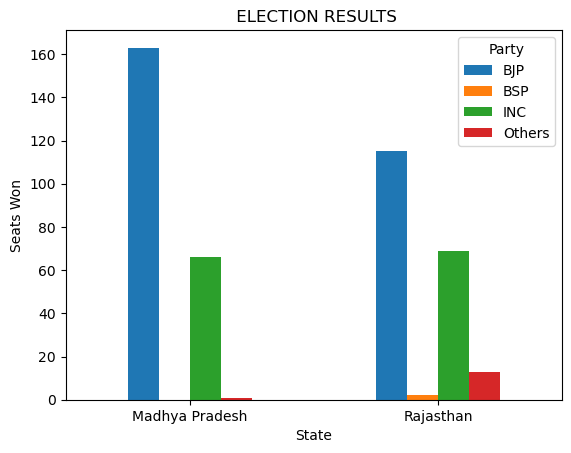

In [33]:
import matplotlib.pyplot as plt
temp.plot(kind='bar')
plt.ylabel('Seats Won')
plt.title(" ELECTION RESULTS")
plt.xticks(rotation=0)